In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
all_time_fitnesses, average_fitness, average_adjusted_fitness = [], [], []
diversity, invalid_count = [], []

In [3]:
with open("fullResult.txt", "r") as f:
    data = f.readlines()

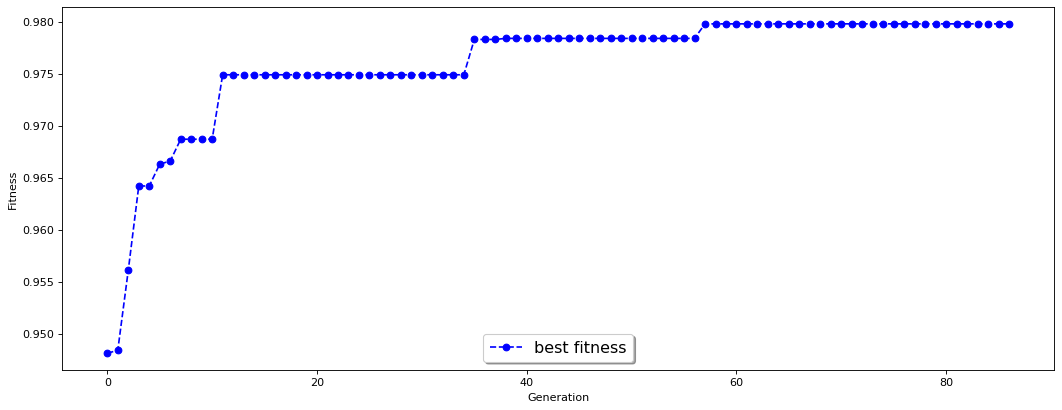

In [4]:
best_fitnesses = list(map(float, data[data.index("TRACKER INFO\n") + 2].strip().split()))
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(best_fitnesses, 'bo--', label="best fitness")
plt.ylabel('Fitness')
plt.xlabel('Generation')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

In [5]:
for i in range(int(data[data.index("TRACKER INFO\n") + 1])):
    generation_index = data.index("\tGeneration " + str(i) + "\n")
    fitnesses, adjusted_fitness_sum, zero, diff = [], 0, 0, 0
    for j in range(1, 51):
        individual_info = data[generation_index + j].strip().split()
        fitness = float(individual_info[1])
        if fitness == 0:
            zero += 1
        fitnesses.append(fitness)
        adjusted_fitness = float(individual_info[2])
        diff += fitness - adjusted_fitness
        adjusted_fitness_sum += adjusted_fitness
    all_time_fitnesses.append(fitnesses)
    average_adjusted_fitness.append(adjusted_fitness_sum / 50)
    average_fitness.append(sum(fitnesses) / 50)
    invalid_count.append(zero)
    diversity.append(diff / 50)

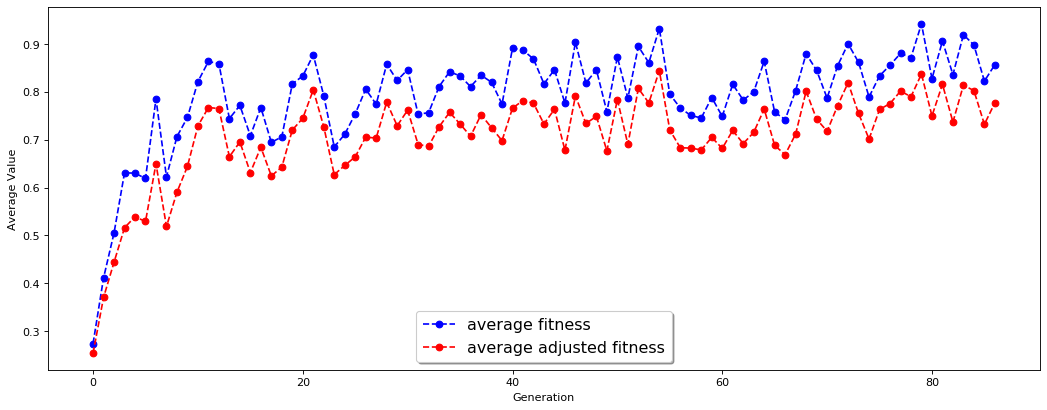

In [6]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(average_fitness, 'bo--', label="average fitness")
ax.plot(average_adjusted_fitness, 'ro--', label="average adjusted fitness")
plt.ylabel('Average Value')
plt.xlabel('Generation')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

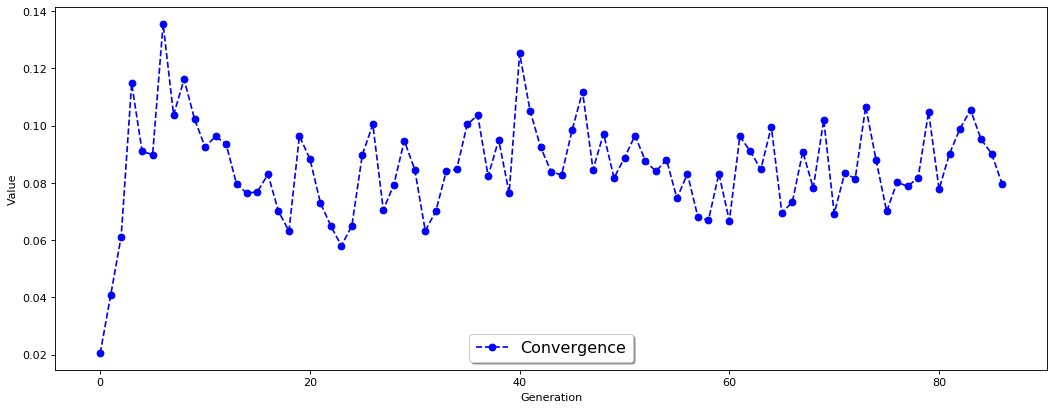

In [7]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(diversity, 'bo--', label="Convergence")
plt.ylabel('Value')
plt.xlabel('Generation')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()

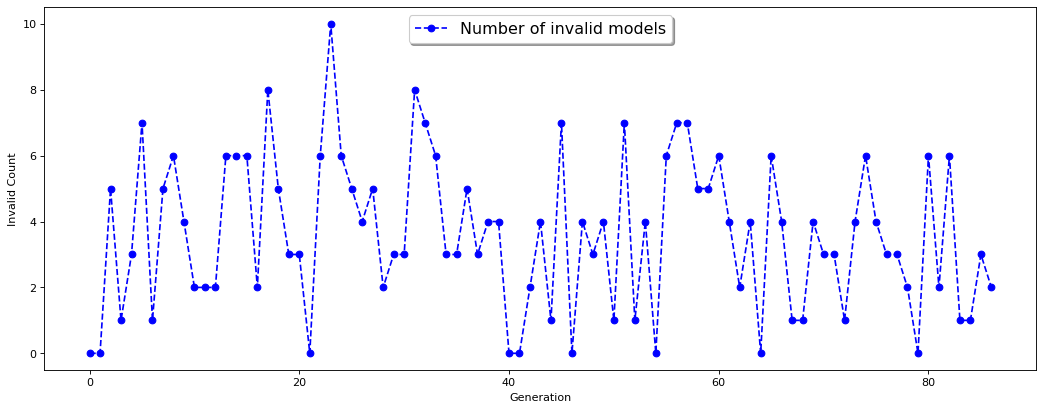

In [8]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.plot(invalid_count, 'bo--', label="Number of invalid models")
plt.ylabel('Invalid Count')
plt.xlabel('Generation')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

In [9]:
import numpy as np
np.array(all_time_fitnesses).shape

(87, 50)

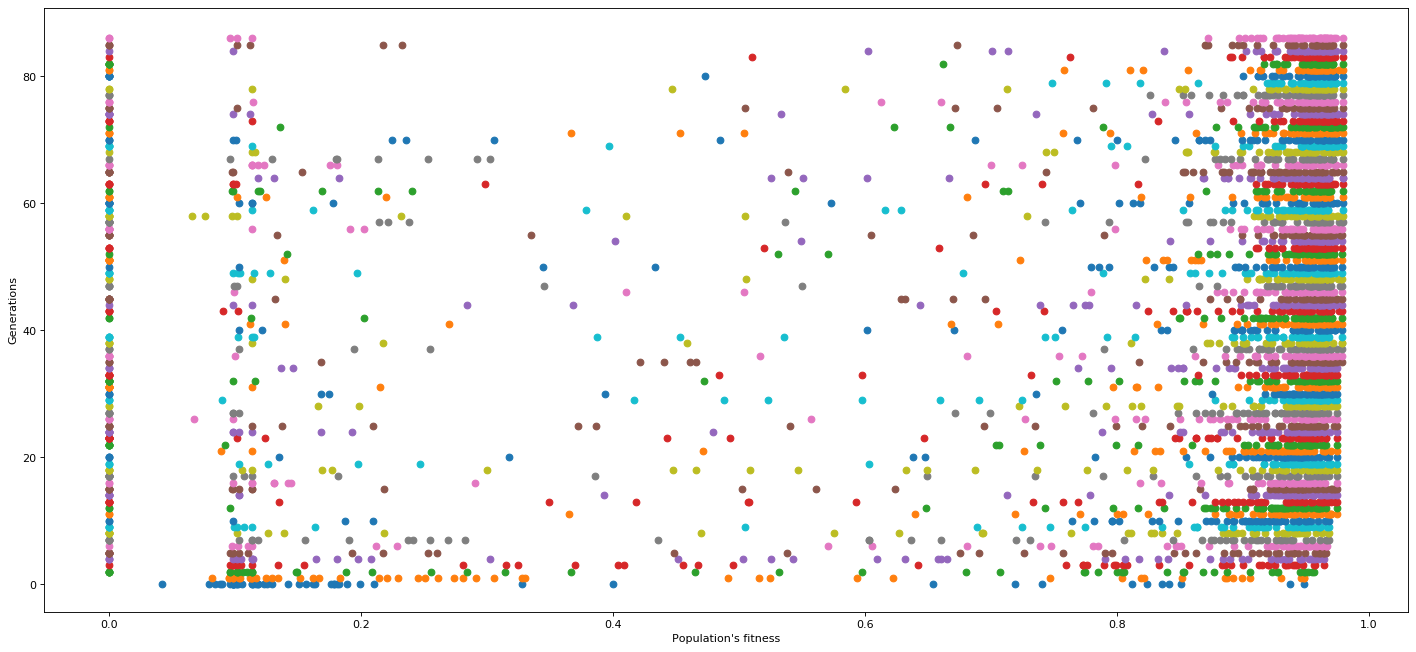

In [10]:
fig, ax = plt.subplots(figsize=(22, 10), dpi=80)
for index, fitnesses in enumerate(all_time_fitnesses):
    ax.scatter(np.array(fitnesses), np.array([index] * 50))
plt.xlabel("Population's fitness")
plt.ylabel("Generations")
plt.show()

In [14]:
current_population = []
for i in range(1, 51):
    individual = data[i].strip().split()
    current_population.append([individual[0], float(individual[1]), float(individual[2])])
current_population.sort(key=lambda x: x[1], reverse=True)
for item in current_population[:11]:
    print(item)

['001000100000011101000000111011101001010000011111001110000101000100100', 0.9797999858856201, 0.8164999882380168]
['001000100000011101000001111011101001011100011111001110000101000101100', 0.9735999703407288, 0.8163006554047266]
['110111111100001101000000011001111001010000110111001111001111011101100', 0.9722999930381775, 0.9590714217043247]
['001000100000011101000000111111000001110000110111001111010111010100100', 0.9699000120162964, 0.8917662838732006]
['010011110111011101000000011001011001010000110111001110001111001101100', 0.9688000082969666, 0.9040935142363157]
['001001101000001000000000111011001001110000011111000000000011001101100', 0.9678999781608582, 0.8518507460854491]
['001000100000011101000000111111001001110010110111001111010111010100100', 0.9664000272750854, 0.8885482527899818]
['011001100000011101000000111011101001010000011110101110001101011101100', 0.9660000205039978, 0.8222500174528077]
['001100100100011010010010111001000001010000110111001110001110001101100', 0.965799987316

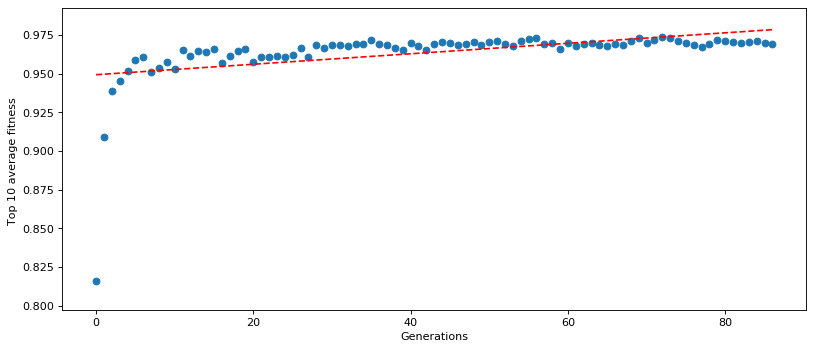

In [12]:
avg_top_10 = []
for i in range(int(data[data.index("TRACKER INFO\n") + 1])):
    generation_index = data.index("\tGeneration " + str(i) + "\n")
    fitnesses = []
    for j in range(1, 51):
        individual = data[generation_index + j].strip().split()
        fitness = float(individual[1])
        fitnesses.append(fitness)
    fitnesses.sort(reverse=True)
    avg_top_10.append(sum(fitnesses[:10])/10)
fig, ax = plt.subplots(figsize=(12, 5), dpi=80)
ax.scatter(np.array([i for i in range(87)]), avg_top_10)
plt.xlabel("Generations")
plt.ylabel("Top 10 average fitness ")
z = np.polyfit([i for i in range(87)], avg_top_10, 1)
p = np.poly1d(z)
plt.plot([i for i in range(87)],p([i for i in range(87)]),"r--")
plt.show()

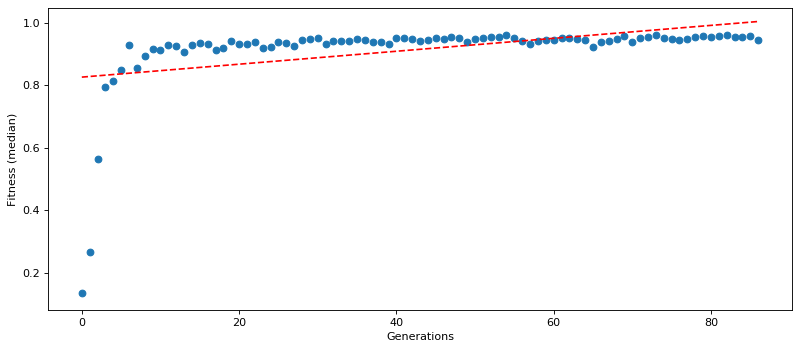

In [13]:
median = []
for i in range(int(data[data.index("TRACKER INFO\n") + 1])):
    generation_index = data.index("\tGeneration " + str(i) + "\n")
    fitnesses = []
    for j in range(1, 51):
        individual = data[generation_index + j].strip().split()
        fitness = float(individual[1])
        fitnesses.append(fitness)
    fitnesses.sort(reverse=True)
    median.append((fitnesses[25] + fitnesses[24])/2)
fig, ax = plt.subplots(figsize=(12, 5), dpi=80)
ax.scatter(np.array([i for i in range(87)]), median)
plt.xlabel("Generations")
plt.ylabel("Fitness (median)")
z = np.polyfit([i for i in range(87)], median, 1)
p = np.poly1d(z)
plt.plot([i for i in range(87)],p([i for i in range(87)]),"r--")
plt.show()